In [1]:
import matplotlib.pyplot as plt
import random
from numpy import cumsum

In [2]:
def collusion_scenario(p, epsilon, n=1000, gas_target=15000000, init_bf=100, txn_fee=101, d=8):
    
    block_sizes = [gas_target]
    mempool = gas_target
    revenue = [0]
    mem_overfilled = mempool > 2 * gas_target
    base_fee = [init_bf]
    colluder_revenue = [0]
    myopic_revenue = [0]
    mempools = []
    
    
    for i in range(n - 1):
        colluding = random.random() < p
        if colluding:
            mined_amount = gas_target - epsilon
        else:
            mined_amount = (2 * gas_target) if mem_overfilled else mempool
        
        mempool -= mined_amount
        new_basefee = basefee(base_fee[i], mined_amount, gas_target, d)
        base_fee.append(new_basefee)
        block_sizes.append(mined_amount)
        block_revenue = (txn_fee - base_fee[i]) * mined_amount
        
        revenue.append(block_revenue) 
        
        if colluding:
            colluder_revenue.append(block_revenue)
        else:
            myopic_revenue.append(block_revenue)
            
        mempool += gas_target
        mem_overfilled = mempool > 2 * gas_target
        mempools.append(mempool)
    
    data = {
        "Basefee" : base_fee,
        "Block Sizes" : block_sizes,
        "Overall Revenues" : revenue,
        "Myopic Revenues" : myopic_revenue,
        "Colluder Revenues" : colluder_revenue,
        "Avg Revenue per Colluder": sum(colluder_revenue) / len(colluder_revenue) - 1,
        "Avg Revenue per Myopic": sum(myopic_revenue) / len(myopic_revenue) - 1,
        "Mempools": mempools
    }
    
    return data

def basefee(previous, mined_amount, gas_target, d): 
    
    return previous*(1+(1/d)*((mined_amount-gas_target)/gas_target))
    

In [3]:
sim = collusion_scenario(.3, 1500000, 500)
controll_sim = collusion_scenario(0, 1500000, 500)

print("Total Revenue Under No Collusion:", sum(controll_sim["Overall Revenues"]))
print("Total Myopic Revenue:", sum(sim["Myopic Revenues"]))
print("Total Colluder Revenues:", sum(sim["Colluder Revenues"]))
print("Average Colluder Revenue:", sim["Avg Revenue per Colluder"])
print("Average Myopic Revenue:", sim["Avg Revenue per Myopic"])
print("Average Revenue Under No Collusion:", sum(controll_sim["Overall Revenues"]) / len(controll_sim["Overall Revenues"]))

Total Revenue Under No Collusion: 7485000000.0
Total Myopic Revenue: 19552231814.925022
Total Colluder Revenues: 6955961408.8200445
Average Colluder Revenue: 45168579.576753534
Average Myopic Revenue: 56346488.380187385
Average Revenue Under No Collusion: 14970000.0


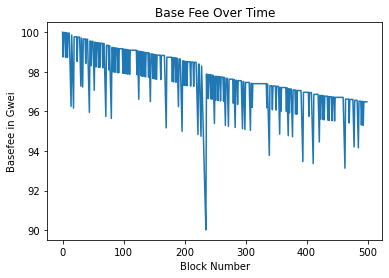

In [4]:
plt.title("Base Fee Over Time")
plt.xlabel("Block Number")
plt.ylabel("Basefee in Gwei")
plt.plot(sim["Basefee"])
plt.savefig('b_fee_original.png')

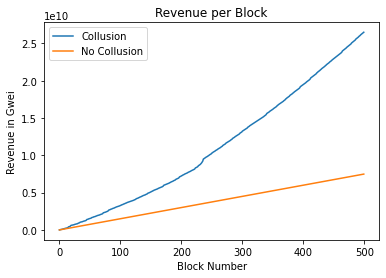

In [5]:
plt.title("Revenue per Block")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(cumsum(sim["Overall Revenues"]), label="Collusion")
plt.plot(cumsum(controll_sim["Overall Revenues"]), label="No Collusion")
plt.legend(loc="upper left")

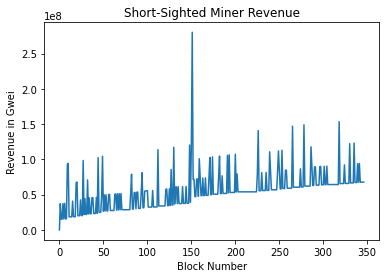

In [6]:
plt.title("Short-Sighted Miner Revenue")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(sim["Myopic Revenues"])
plt.savefig('m_revenue_original.png')

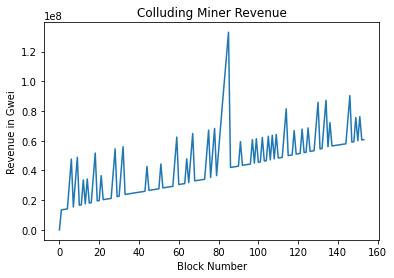

In [7]:
plt.title("Colluding Miner Revenue")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(sim["Colluder Revenues"])
plt.savefig('c_revenue_original.png')